In [1]:
import pandas as pd
from fbprophet import Prophet

In [10]:
df = pd.read_csv('netlfix_quarter.csv')
df.head()

,Quarter_Date,Netflix_Revenue(Millions$US)
0,2020-12-31,6644
1,2020-09-30,6436
2,2020-06-30,6148
3,2020-03-31,5768
4,2019-12-31,5467


In [3]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Netflix_Revenue(Millions$US)": 'y'})
company_quarter

,ds,y
0,2020-12-31,6644
1,2020-09-30,6436
2,2020-06-30,6148
3,2020-03-31,5768
4,2019-12-31,5467
...,...,...
59,2006-03-31,224
60,2005-12-31,193
61,2005-09-30,173
62,2005-06-30,164


In [4]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
67,2021-12-31
68,2022-03-31
69,2022-06-30
70,2022-09-30
71,2022-12-31


In [6]:
forecast = model.predict(future)

In [11]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20)

,ds,yhat,yhat_lower,yhat_upper
0,2005-03-31,198.032038,138.281474,254.398117
1,2005-06-30,186.915877,127.627607,243.089887
2,2005-09-30,170.327995,110.181952,223.494613
3,2005-12-31,172.657333,113.206399,232.823731
4,2006-03-31,231.107093,171.929792,292.375703
5,2006-06-30,226.246294,162.544922,281.145208
6,2006-09-30,209.080805,152.432936,266.640160
7,2006-12-31,212.454085,158.036341,266.402026
8,2007-03-31,254.714108,198.438766,310.878789
9,2007-06-30,298.680019,240.702966,362.951795


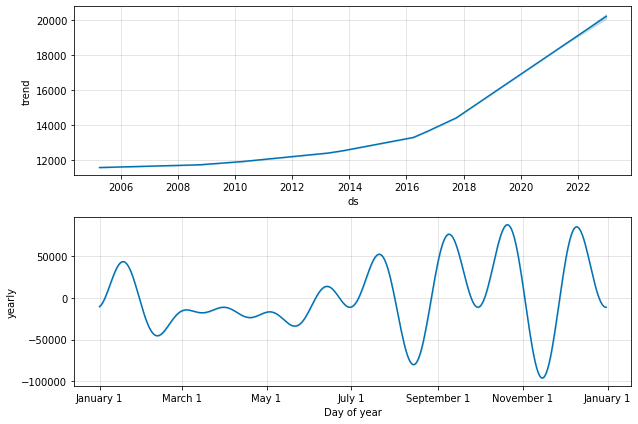

In [8]:

plot2 = model.plot_components(forecast)

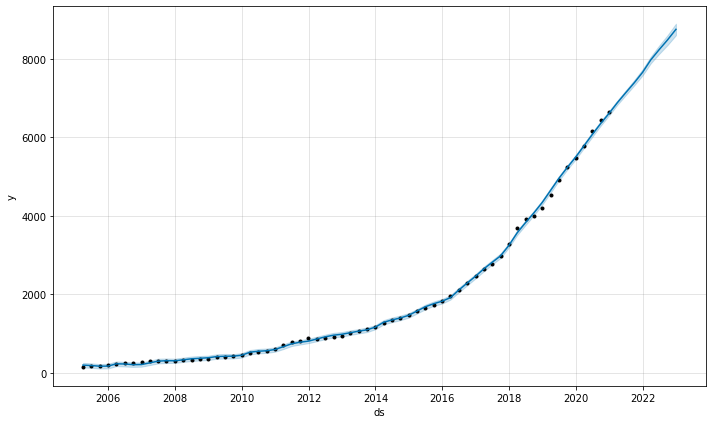

In [9]:

plot1 = model.plot(forecast)